<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/1-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###라이브러리 설명

*OpenCV: 컴퓨터 비전 라이브러리

*NumPy: 행렬 백터 스칼라같은 수 데이터 처리, 연산

*Pandas: 테이블 형식의 데이터 처리(액셀)

*Matplotlib: 데이터 시각화

*KNeighborsClassifier: KNN알고리즘 구현 클래스


In [ ]:
import cv2 # 컴퓨터 비전 라이브러리
import numpy as np # 행렬=2차원 배열, 벡터=1차원 배열, 스칼라=변수
import pandas as pd # 액셀처리
import matplotlib # 시각화해주는거

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
 # 여기서 len이랑 wei는 데이터의 특성(feature)이다.

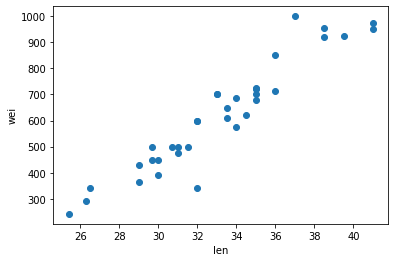

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(bream_length,bream_weight)
plt.xlabel('len')
plt.ylabel('wei')
plt.show()

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

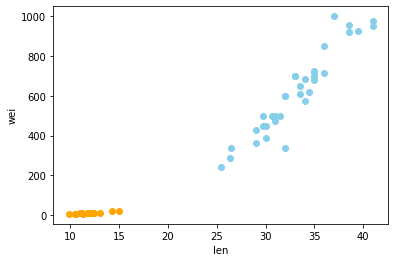

In [ ]:
plt.scatter(smelt_length,smelt_weight,color='orange')
plt.scatter(bream_length,bream_weight,color='skyblue')
plt.xlabel("len")
plt.ylabel("wei")
plt.show()

In [ ]:
length=bream_length+smelt_length
weight=bream_weight+smelt_weight
print(length, weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [ ]:
fish_data=[[l,w] for l,w in zip(length,weight)] # c++에 struct처럼 자료형 2개를 묶는다. 이런건 type이 없어서 좋네

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
print(len(bream_length))
print(len(smelt_length))
fish_target=[1]*35+[0]*14
print(fish_target)

35
14
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn=KNeighborsClassifier()

In [ ]:
kn.fit(fish_data,fish_target) # 알고리즘 훈련

KNeighborsClassifier()

In [ ]:
kn.score(fish_data,fish_target) # 정확도 나타냄

1.0

###본격적인 knn알고리즘 시작

In [ ]:
kn.predict([[30,600]]) # 새 데이터 정답 예측

array([1])

In [ ]:
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
kn49=KNeighborsClassifier(n_neighbors=49) # 직접 참고 데이터

In [ ]:
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

0.7142857142857143

In [ ]:
kntest=KNeighborsClassifier()
kntest.fit(fish_data,fish_target)

for i in range(5,50):
  kntest.n_neighbors=i
  score=round(kntest.score(fish_data,fish_target),5)
  print(i,"{0}%".format(score*100)) # 값마다 정확도 테스트

5 100.0%
6 100.0%
7 100.0%
8 100.0%
9 100.0%
10 100.0%
11 100.0%
12 100.0%
13 100.0%
14 100.0%
15 100.0%
16 100.0%
17 100.0%
18 97.959%
19 97.959%
20 97.959%
21 97.959%
22 97.959%
23 97.959%
24 97.959%
25 97.959%
26 97.959%
27 97.959%
28 95.918%
29 71.429%
30 71.429%
31 71.429%
32 71.429%
33 71.429%
34 71.429%
35 71.429%
36 71.429%
37 71.429%
38 71.429%
39 71.429%
40 71.429%
41 71.429%
42 71.429%
43 71.429%
44 71.429%
45 71.429%
46 71.429%
47 71.429%
48 71.429%
49 71.429%
